# Ejemplos formacion de imagen

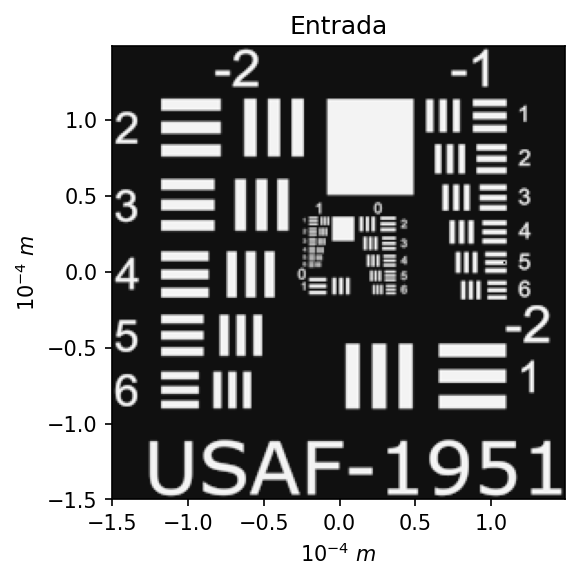

In [ ]:
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt
from PIL import Image as im

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

def circ(x): # FUNCION circulo EN 2D
        s=np.zeros(x.shape)
        s[(x)<1]=1.0
        return s
    
def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-1/2]=1
    R2[0,x<1/2]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-1/2]=1
    R2[0,y<1/2]=1
    Ry=R1*R2
    return Rx.T@Ry

fig = plt.figure(dpi=150)
L=0.3e-3
M=250
dx=L/M
I=im.open('./6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))
ug=np.sqrt(I)

x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

plt.imshow(np.abs(ug)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

100000.00000000001
(250,)


Text(0.5, 0, '$f_x$ $(10^5$ $cyc/m)$')

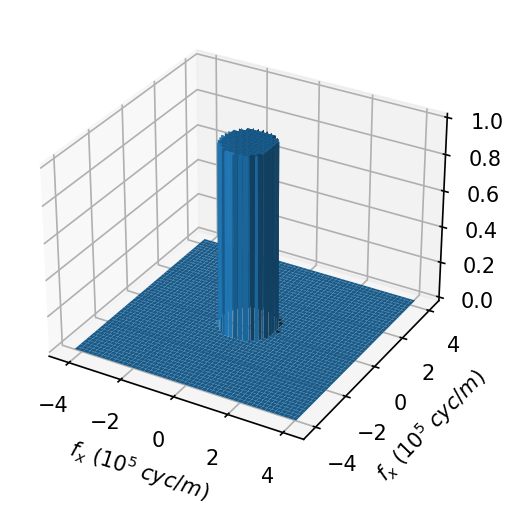

In [ ]:
wl=0.5*10**(-6)
wxp=6.25E-3
zxp=125.0E-3
f0=wxp/(wl*zxp)
print(f0)
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
print(fx.shape)
fxx,fyy=np.meshgrid(fx,fy)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)
    
fig = plt.figure(dpi=150)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(fxx*1E-5,fyy*1E-5,np.abs(H))
ax.set_xlabel('$f_x$ $(10^5$ $cyc/m)$')
ax.set_ylabel('$f_x$ $(10^5$ $cyc/m)$')


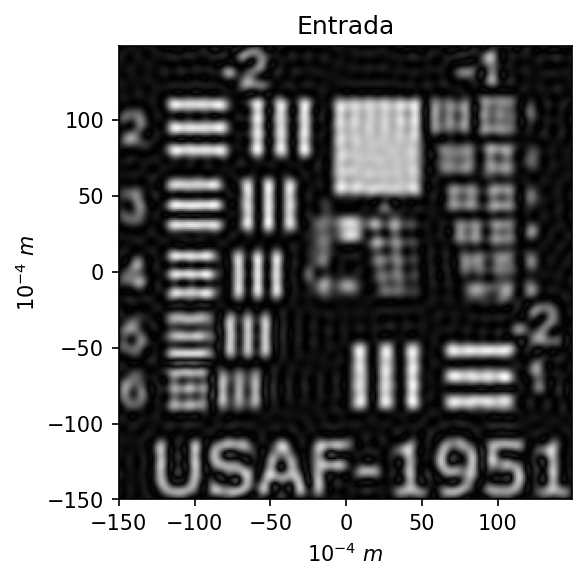

In [ ]:
Hs=sft.fftshift(H)
ui=convft(ug,Hs,dx)
Ii=np.abs(ui)**2

fig = plt.figure(dpi=150)
plt.imshow((Ii)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

## Diferentes tamaños pupila circular

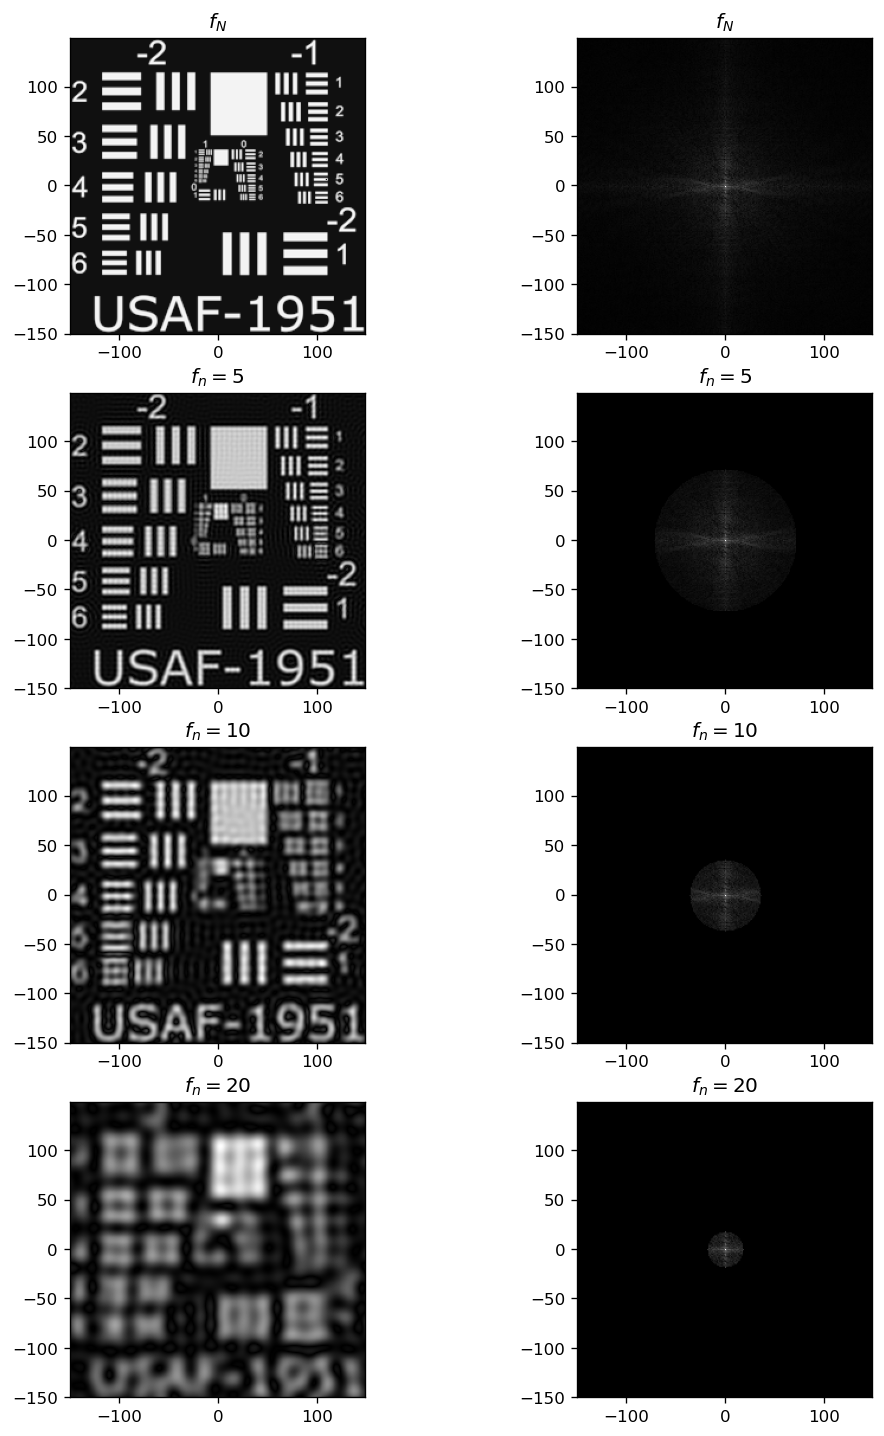

In [ ]:
L=0.3e-3
M=250
dx=L/M
wl=0.5*10**(-6)


zxp=125.0E-3

f0=wxp/(wl*zxp)

H=np.ones([M,M])
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G1=sft.fftshift(G)
ui1=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii1=np.abs(ui1)**2

fn=5
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G2=sft.fftshift(G)
ui2=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii2=np.abs(ui2)**2

fn=10
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G3=sft.fftshift(G)
ui3=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii3=np.abs(ui3)**2

fn=20
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G4=sft.fftshift(G)
ui4=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii4=np.abs(ui4)**2

fig = plt.figure(dpi=120)
plt.rcParams['figure.figsize'] = 10,20
ax = fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(Ii1)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_N$')
ax = fig.add_subplot(4, 2,2)
ax.imshow(np.abs(G1)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_N$')


ax = fig.add_subplot(4, 2, 3)
ax.imshow(np.abs(Ii2)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 5$')
ax = fig.add_subplot(4, 2, 4)
ax.imshow(np.abs(G2)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 5$')

ax = fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(Ii3)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 10$')
ax = fig.add_subplot(4, 2, 6)
ax.imshow(np.abs(G3)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 10$')

ax = fig.add_subplot(4, 2, 7)
ax.imshow(np.abs(Ii4)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 20$')
ax = fig.add_subplot(4, 2, 8)
ax.imshow(np.abs(G4)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 20$')

plt.show()

## Pupila cuadrada

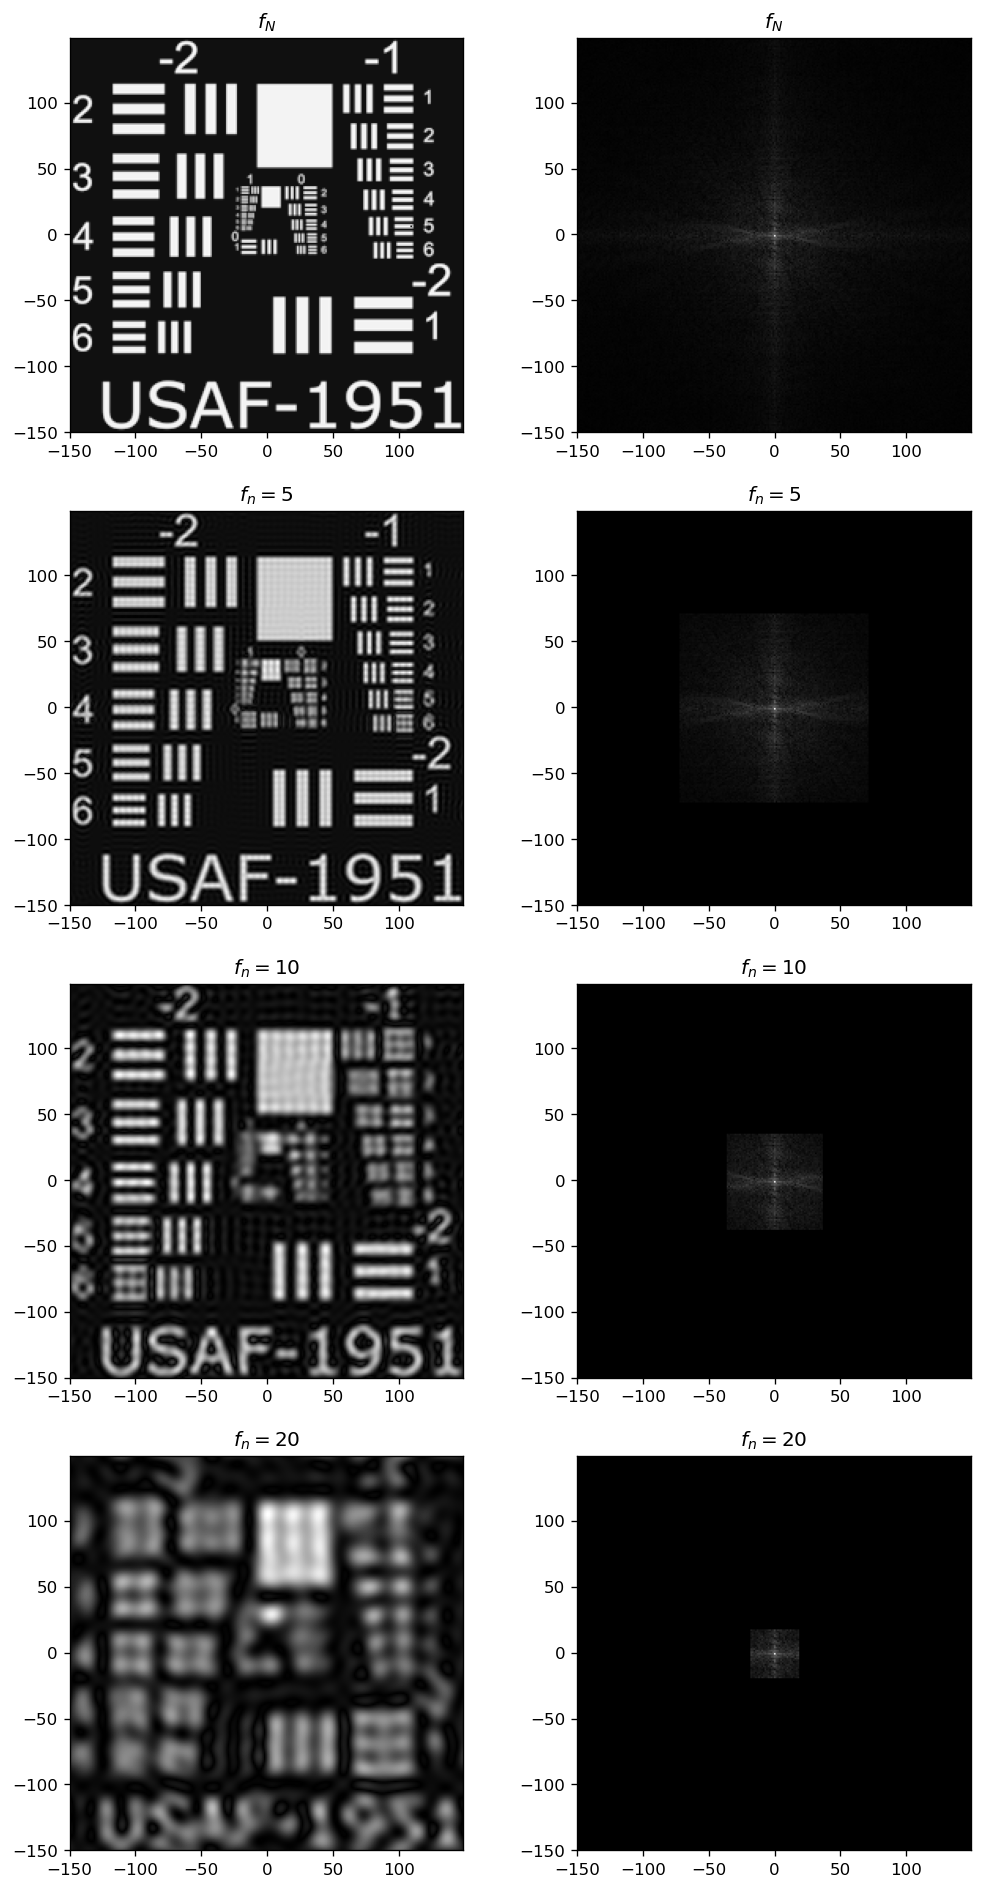

In [ ]:
L=0.3e-3
M=250
dx=L/M
wl=0.5*10**(-6)

def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-1/2]=1
    R2[0,x<1/2]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-1/2]=1
    R2[0,y<1/2]=1
    Ry=R1*R2
    return Rx.T@Ry

zxp=125.0E-3

f0=wxp/(wl*zxp)

H=np.ones([M,M])
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G1=sft.fftshift(G)
ui1=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii1=np.abs(ui1)**2

fn=5
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=rect2D(fx/(2*f0),fy/(2*f0))
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G2=sft.fftshift(G)
ui2=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii2=np.abs(ui2)**2

fn=10
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=rect2D(fx/(2*f0),fy/(2*f0))
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G3=sft.fftshift(G)
ui3=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii3=np.abs(ui3)**2

fn=20
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)

H=rect2D(fx/(2*f0),fy/(2*f0))
Hs=sft.fftshift(H)
G=sft.fft2(sft.fftshift(ug))*(dx**2)
G=Hs*G
G4=sft.fftshift(G)
ui4=sft.ifftshift(sft.ifft2(G)*(1/dx**2))
Ii4=np.abs(ui4)**2

fig = plt.figure(dpi=120)
plt.rcParams['figure.figsize'] = 10,20
ax = fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(Ii1)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_N$')
ax = fig.add_subplot(4, 2,2)
ax.imshow(np.abs(G1)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_N$')


ax = fig.add_subplot(4, 2, 3)
ax.imshow(np.abs(Ii2)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 5$')
ax = fig.add_subplot(4, 2, 4)
ax.imshow(np.abs(G2)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 5$')

ax = fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(Ii3)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 10$')
ax = fig.add_subplot(4, 2, 6)
ax.imshow(np.abs(G3)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 10$')

ax = fig.add_subplot(4, 2, 7)
ax.imshow(np.abs(Ii4)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 20$')
ax = fig.add_subplot(4, 2, 8)
ax.imshow(np.abs(G4)**(1/2), cmap='gray',extent=[np.min(x1*1E6),np.max(x1*1E6),np.min(y1*1E6),np.max(y1*1E6)])
ax.title.set_text('$f_n = 20$')

plt.show()

## Objeto rugoso

Uno de los problemas de la formacion de imagen con luz coherente es que es comun que los objetos tengan rugosidades del orden de magnitud de la longitud de onda de la luz. Esto se puede modelar como cambios de fase aleatorios en el campo del objeto de entrada, y produce un fenomeno llamado speckle. Veamos

200000.00000000003
(250,)


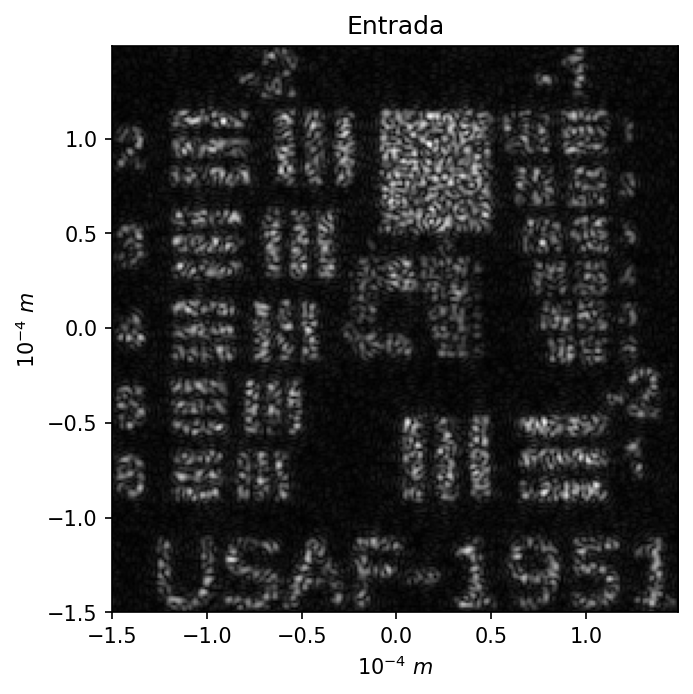

In [ ]:
ugs=ug*np.exp(1j*np.pi*2*np.random.rand(M,M))

wl=0.5*10**(-6)
wxp=6.25E-3
zxp=125.0E-3
fn=5
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)
print(f0)
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
print(fx.shape)
fxx,fyy=np.meshgrid(fx,fy)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)
Hs=sft.fftshift(H)
ui=convft(ugs,Hs,dx)
Ii=np.abs(ui)**2
plt.rcParams['figure.figsize'] = 5,5
fig = plt.figure(dpi=150)
plt.imshow((Ii)**(1/2), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

## Caso incoherente: Pupila circular

200000.00000000003
(250,)


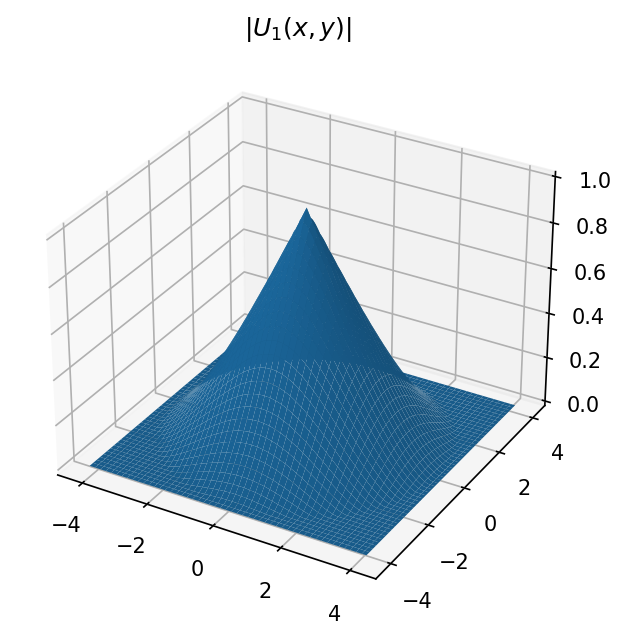

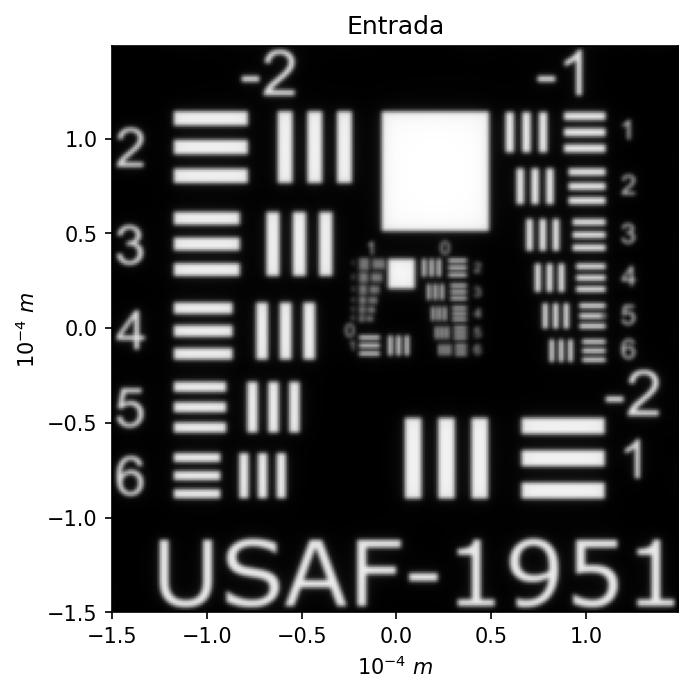

In [ ]:
wl=0.5*10**(-6)
wxp=6.25E-3
zxp=125.0E-3
fn=5
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)
print(f0)
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
print(fx.shape)
fxx,fyy=np.meshgrid(fx,fy)

H=circ(np.sqrt(fxx**2+fyy**2)/f0)

OTF=sft.ifft2(np.abs(sft.fft2(sft.fftshift(H)))**2)
OTF=np.abs(OTF/OTF[0,0])

I=im.open('./6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))


Gg=sft.fft2(sft.fftshift(I))
Gi=Gg*OTF
Ii=sft.ifftshift(sft.ifft2(Gi))
Ii=np.abs(Ii)

OTF=sft.fftshift(OTF)


fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(fxx*1E-5,fyy*1E-5,np.abs(OTF))
ax.title.set_text('$|U_1(x,y)|$')


plt.rcParams['figure.figsize'] = 5,5
fig = plt.figure(dpi=150)
plt.imshow((Ii), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()


## Caso incoherente: Pupila cuadrada

200000.00000000003
(250,)


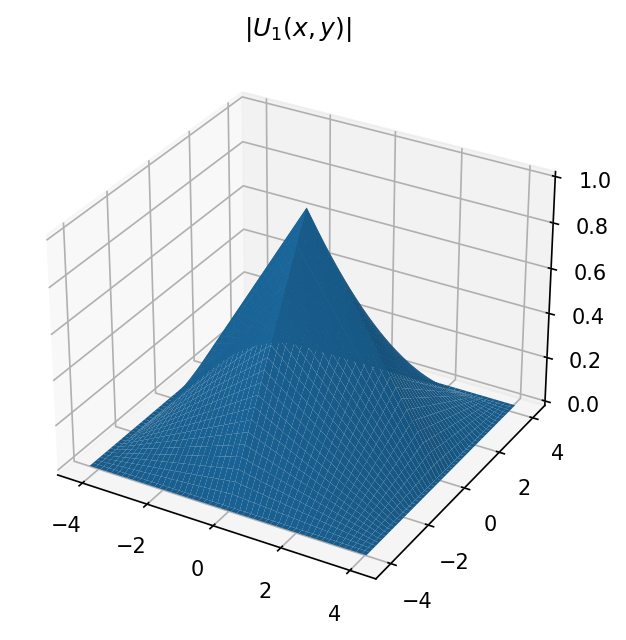

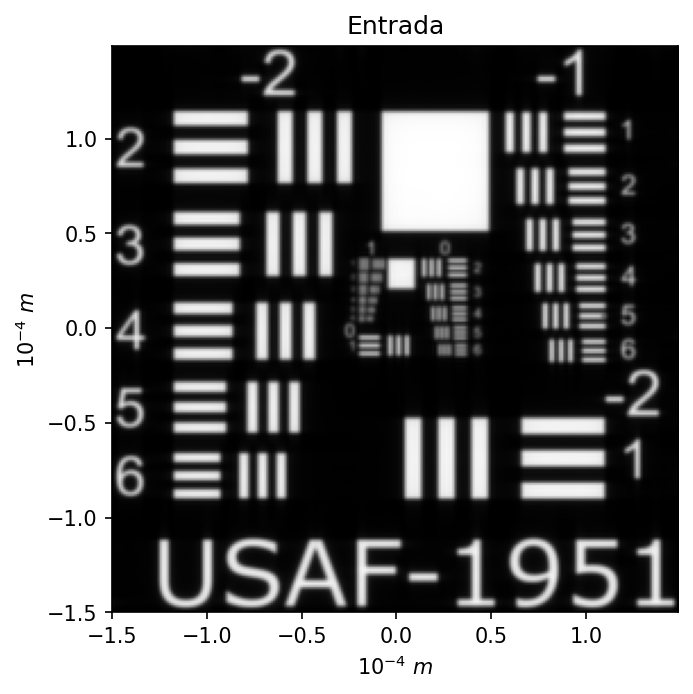

In [ ]:
wl=0.5*10**(-6)
wxp=6.25E-3
zxp=125.0E-3
fn=5
wxp=zxp/(2*fn)
f0=wxp/(wl*zxp)
print(f0)
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
print(fx.shape)
fxx,fyy=np.meshgrid(fx,fy)

H=rect2D(fx/(2*f0),fy/(2*f0))

OTF=sft.ifft2(np.abs(sft.fft2(sft.fftshift(H)))**2)
OTF=np.abs(OTF/OTF[0,0])

I=im.open('./6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))


Gg=sft.fft2(sft.fftshift(I))
Gi=Gg*OTF
Ii=sft.ifftshift(sft.ifft2(Gi))
Ii=np.abs(Ii)

OTF=sft.fftshift(OTF)


fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(fxx*1E-5,fyy*1E-5,np.abs(OTF))
ax.title.set_text('$|U_1(x,y)|$')


plt.rcParams['figure.figsize'] = 5,5
fig = plt.figure(dpi=150)
plt.imshow((Ii), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()